# Classification Using Joint Probability

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
mini_iris = np.round(iris.data[:, :2]).astype(int)
data = pd.DataFrame(mini_iris, columns = ['length', 'width'])
data['type'] = iris.target

In [3]:
# shuffle data
data = data.sample(frac = 1, random_state = 0)
data

,length,width,type
114,6,3,2
62,6,2,1
33,6,4,0
107,7,3,2
7,5,3,0
...,...,...,...
9,5,3,0
103,6,3,2
67,6,3,1
117,8,4,2


### 1. Decision Tree

In [4]:
import matplotlib.pyplot as plt
import numpy as np

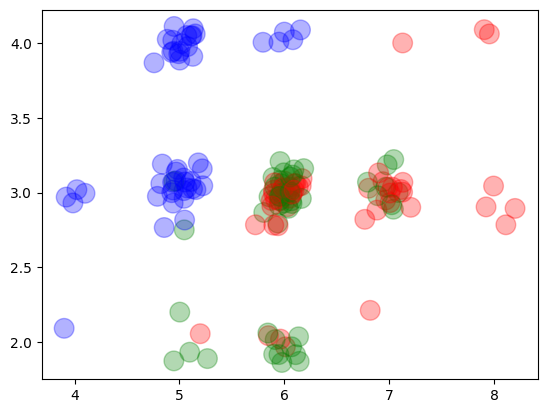

In [5]:
np.random.seed = 10
data_with_noise = data.iloc[:, :2] + np.random.normal(loc = 0, scale = 0.1, size = (150, 2), )
plt.scatter(data_with_noise.length, data_with_noise.width, c = ["bgr"[k] for k in data.iloc[:,2]], s = 200, alpha = 0.3)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test = data[:120], data[120:]

y_train = X_train['type']
y_test = X_test['type']

X_train = X_train.drop('type', axis = 1)
X_test = X_test.drop('type', axis = 1)

In [8]:
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [9]:
classifier.predict(X_test)

array([0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 1, 1, 2, 0])

In [10]:
classifier.score(X_test, y_test)

0.8

### 2. Probabilistic Model

In [11]:
X_train, X_test = data[:120], data[120:]

In [12]:
# computing the joint probability distribution over the training data
joint_prob = X_train.groupby(['length', 'width', 'type']).size() / 120
joint_prob

length  width  type
4       2      0       0.008333
        3      0       0.033333
5       2      1       0.033333
               2       0.008333
        3      0       0.141667
               1       0.016667
        4      0       0.125000
6       2      1       0.050000
               2       0.025000
        3      1       0.175000
               2       0.166667
        4      0       0.025000
7       2      2       0.008333
        3      1       0.050000
               2       0.091667
        4      2       0.008333
8       3      2       0.025000
        4      2       0.008333
dtype: float64

In [13]:
X_test_features = X_test.iloc[:-7, :2].values
X_test_actual_results = X_test.iloc[:-7, 2].values

In [14]:
predicted_values = []

for i in range(len(X_test_features)):
    predicted_values.append(joint_prob[X_test_features[i, 0], X_test_features[i, 1]].idxmax())

In [15]:
predicted_values = np.array(predicted_values)
predicted_values

array([0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1,
       1])

In [16]:
predicted_values == X_test_actual_results

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True])

In [17]:
score = (predicted_values == X_test_actual_results).sum() / 30
print(score)

0.6
